# **Klasifikasi Random Forest (Ecoli)**

Kita akan melakukan klasifikasi data ecoli menggunakan metode random forest:

* data ecoli sebelum oversampling
* data ecoli sesudah oversampling (SMOTE)
* data ecoli sesudah oversampling (ADASYN)

Mencari akurasi dari setiap jenis kondisi data dan mencari akurasi tertinggi atau terbaik


## Instalasi Library

Install library yang akan digunakan dalam mendukung proses pemodelan

In [ ]:
!pip install pandas scikit-learn matplotlib openpyxl pymysql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



## Pengambilan Data

Data ecoli diambil dari:
https://archive.ics.uci.edu/dataset/39/ecoli

dan dilakukan dengan cara:

1. data asli yang sudah berada pada csv
2. data oversampling smote yang sudah dalam bentuk xlsx
2. data oversampling adasyn yang sudah dalam bentuk xlsx

### Pengambilan data Ecoli asli

In [ ]:
from google.colab import files
import pandas as pd

# Upload file data_ecoli.xlsx
uploaded = files.upload()

# Baca file
df = pd.read_excel("data_ecoli.xlsx")
X = df.drop(columns=["class"])
y = df["class"]
df


Saving data_ecoli.xlsx to data_ecoli (1).xlsx


,id,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,1,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,2,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,3,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,4,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,5,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,332,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,333,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,334,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,335,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


### Pengambilan data Ecoli Oversampling (SMOTE)

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df_smote = pd.read_excel("hasil_smote.xlsx")
x_smote = df_smote.drop(columns=["class"])
y_smote = df_smote["class"]
df_smote


Saving hasil_smote.xlsx to hasil_smote (4).xlsx


,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.490000,0.290000,0.48,0.5,0.560000,0.240000,0.350000,cp
1,0.070000,0.400000,0.48,0.5,0.540000,0.350000,0.440000,cp
2,0.560000,0.400000,0.48,0.5,0.490000,0.370000,0.460000,cp
3,0.590000,0.490000,0.48,0.5,0.520000,0.450000,0.360000,cp
4,0.230000,0.320000,0.48,0.5,0.550000,0.250000,0.350000,cp
...,...,...,...,...,...,...,...,...
1139,0.660161,0.679839,0.48,0.5,0.615080,0.440214,0.400054,pp
1140,0.755882,0.732574,0.48,0.5,0.439485,0.392574,0.391544,pp
1141,0.632786,0.854427,0.48,0.5,0.384427,0.464427,0.356719,pp
1142,0.734496,0.747339,0.48,0.5,0.316421,0.541008,0.523669,pp


### Pengambilan data Ecoli Oversampling (ADASYN)

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df_adasyn = pd.read_excel("hasil_adasyn.xlsx")
x_adasyn = df_adasyn.drop(columns=["class"])
y_adasyn = df_adasyn["class"]
df_adasyn


Saving hasil_adasyn.xlsx to hasil_adasyn (3).xlsx


,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.490000,0.290000,0.48,0.5,0.560000,0.240000,0.350000,cp
1,0.070000,0.400000,0.48,0.5,0.540000,0.350000,0.440000,cp
2,0.560000,0.400000,0.48,0.5,0.490000,0.370000,0.460000,cp
3,0.590000,0.490000,0.48,0.5,0.520000,0.450000,0.360000,cp
4,0.230000,0.320000,0.48,0.5,0.550000,0.250000,0.350000,cp
...,...,...,...,...,...,...,...,...
1146,0.406464,0.508027,0.48,0.5,0.488118,0.670000,0.396282,im
1147,0.359502,0.539751,0.48,0.5,0.397687,0.665783,0.299092,im
1148,0.628443,0.534551,0.48,0.5,0.599400,0.790778,0.771856,im
1149,0.584697,0.617865,0.48,0.5,0.613573,0.688472,0.663775,im


## **Klasifikasi tanpa Oversampling**

Klasifikasi pada data ecoli sebelum melalui proses oversampling

accuracy_score : 0.9558823529411765
Classification Report:
               precision    recall  f1-score   support

          cp       0.97      1.00      0.98        32
          im       1.00      0.92      0.96        13
         imS       0.00      0.00      0.00         1
         imU       0.80      1.00      0.89         4
          om       0.86      1.00      0.92         6
         omL       1.00      1.00      1.00         1
          pp       1.00      0.91      0.95        11

    accuracy                           0.96        68
   macro avg       0.80      0.83      0.82        68
weighted avg       0.95      0.96      0.95        68



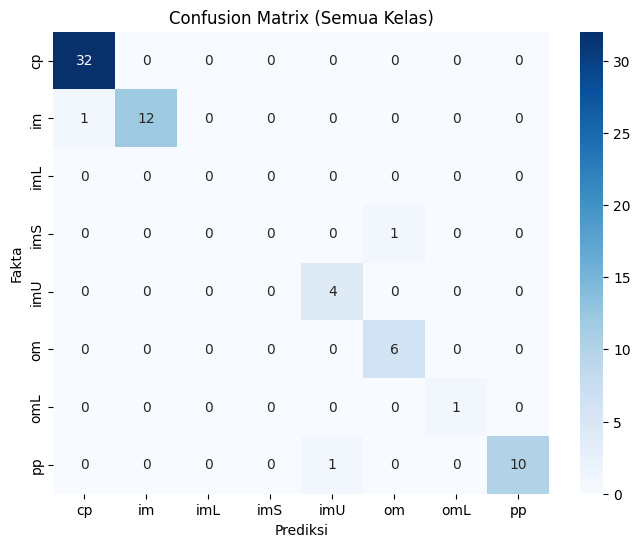

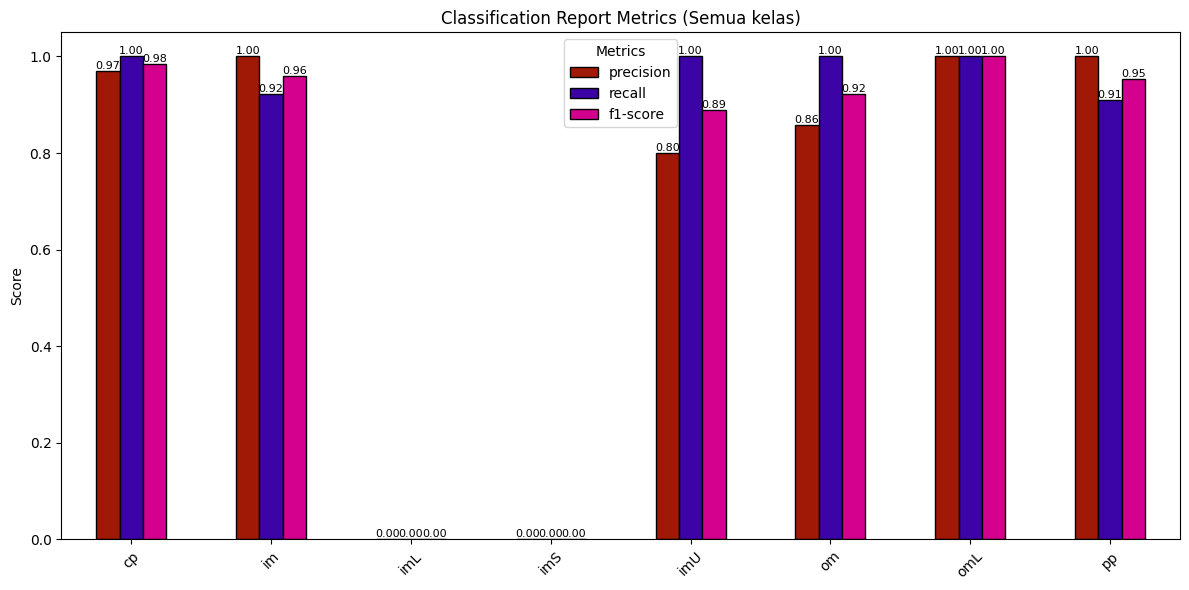

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

prediksi = rf.predict(X_test)

print(f"accuracy_score : {accuracy_score(y_test, prediksi)}")
print("Classification Report:\n", classification_report(y_test, prediksi, zero_division=0))

# confuison matrix

labels = np.unique(np.concatenate([y_train, y_test]))

cm = confusion_matrix(y_test, prediksi, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

all_labels = np.unique(np.concatenate([y_train, y_test]))

report = classification_report(
    y_test, prediksi, labels=all_labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()

metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

# warna diagram batang
ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"], # biru, oranye, hijau
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# diagram batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

## **Klasifikasi Data Oversampling (SMOTE)**

Klasifikasi pada data ecoli sesudah melalui proses oversampling menggunakan SMOTE

accuracy_score : 0.9694323144104804
Classification Report:
               precision    recall  f1-score   support

          cp       0.94      1.00      0.97        32
          im       1.00      0.82      0.90        28
         imL       1.00      1.00      1.00        29
         imS       1.00      1.00      1.00        31
         imU       0.84      1.00      0.92        27
          om       1.00      1.00      1.00        29
         omL       1.00      1.00      1.00        19
          pp       1.00      0.94      0.97        34

    accuracy                           0.97       229
   macro avg       0.97      0.97      0.97       229
weighted avg       0.97      0.97      0.97       229



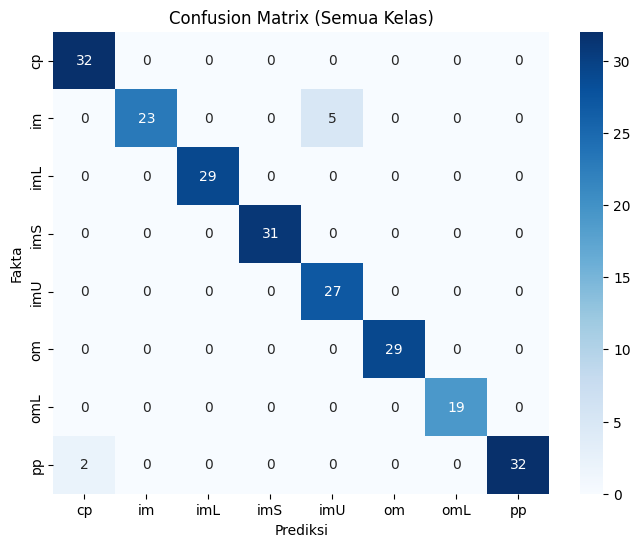

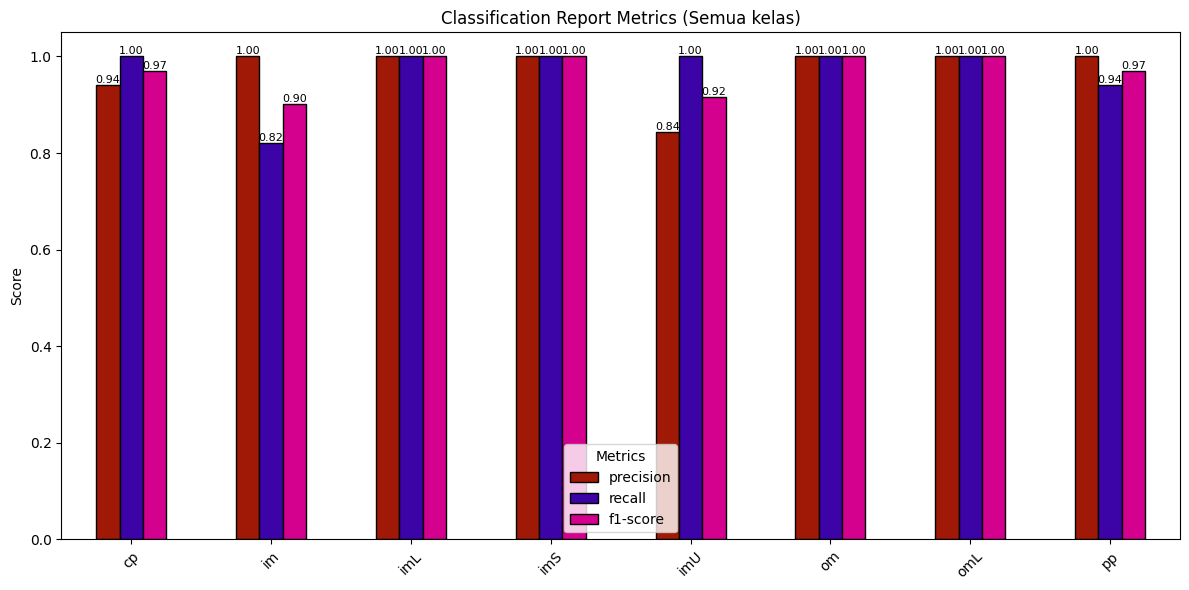

In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    x_smote, y_smote, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

prediksi_smote = rf.predict(X_test_smote)

print(f"accuracy_score : {accuracy_score(y_test_smote, prediksi_smote)}")
print("Classification Report:\n", classification_report(y_test_smote, prediksi_smote, zero_division=0))

# confuison matrix

labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))

cm = confusion_matrix(y_test_smote, prediksi_smote, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

all_labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))

report = classification_report(
    y_test_smote, prediksi_smote, labels=all_labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()

metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

# warna diagram batang
ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"], # biru, oranye, hijau
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# diagram batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

## **Klasifikasi Data Oversampling (ADASYN)**

Klasifikasi pada data ecoli sesudah melalui proses oversampling menggunakan ADASYN

accuracy_score : 0.961038961038961
Classification Report:
               precision    recall  f1-score   support

          cp       1.00      0.97      0.98        31
          im       0.92      0.82      0.87        28
         imL       1.00      1.00      1.00        27
         imS       1.00      1.00      1.00        29
         imU       0.88      0.94      0.91        31
          om       1.00      0.97      0.99        36
         omL       1.00      1.00      1.00        21
          pp       0.90      1.00      0.95        28

    accuracy                           0.96       231
   macro avg       0.96      0.96      0.96       231
weighted avg       0.96      0.96      0.96       231



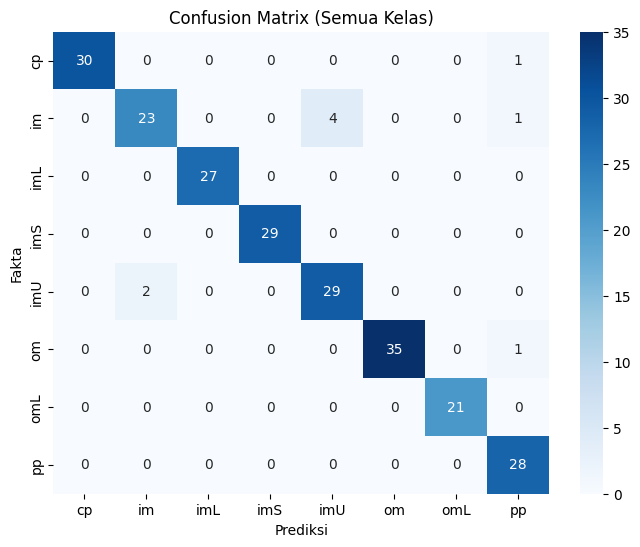

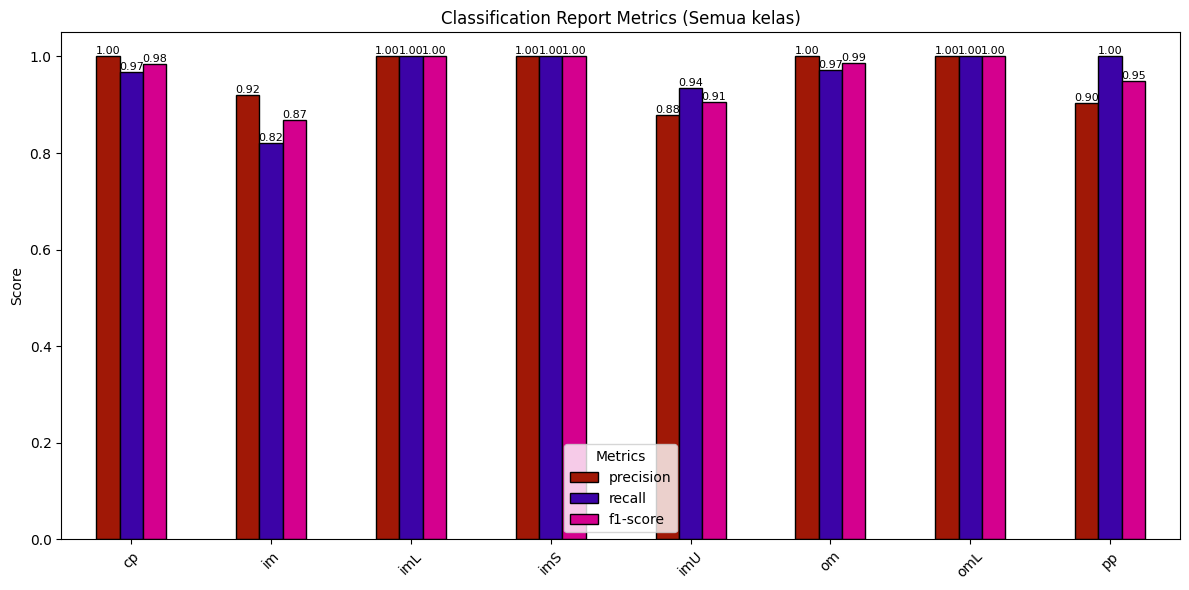

In [ ]:
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(
    x_adasyn, y_adasyn, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_adasyn, y_train_adasyn)

prediksi_adasyn = rf.predict(X_test_adasyn)

print(f"accuracy_score : {accuracy_score(y_test_adasyn, prediksi_adasyn)}")
print("Classification Report:\n", classification_report(y_test_adasyn, prediksi_adasyn, zero_division=0))

# confuison matrix

labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))

cm = confusion_matrix(y_test_adasyn, prediksi_adasyn, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

all_labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))

report = classification_report(
    y_test_adasyn, prediksi_adasyn, labels=all_labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()

metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

# warna diagram batang
ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# diagram batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

## **Perbandingan Akurasi**

Membandingkan akurasi data ecoli:

1. Data Asli
2. Data Oversampling SMOTE
2. Data Oversampling ADASYN



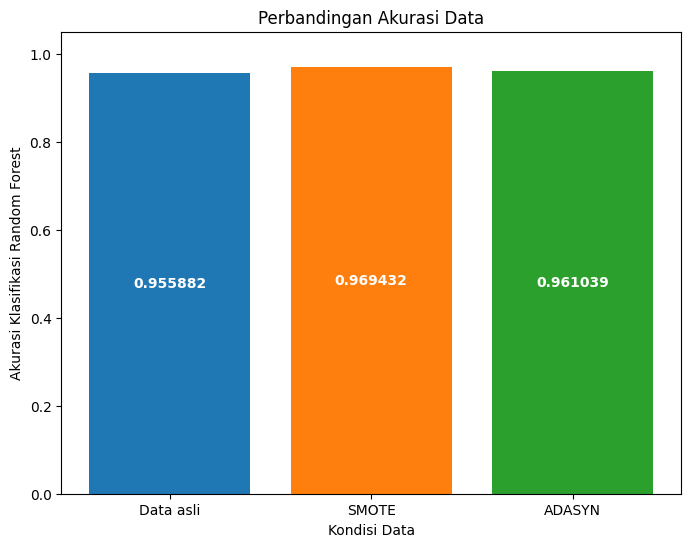

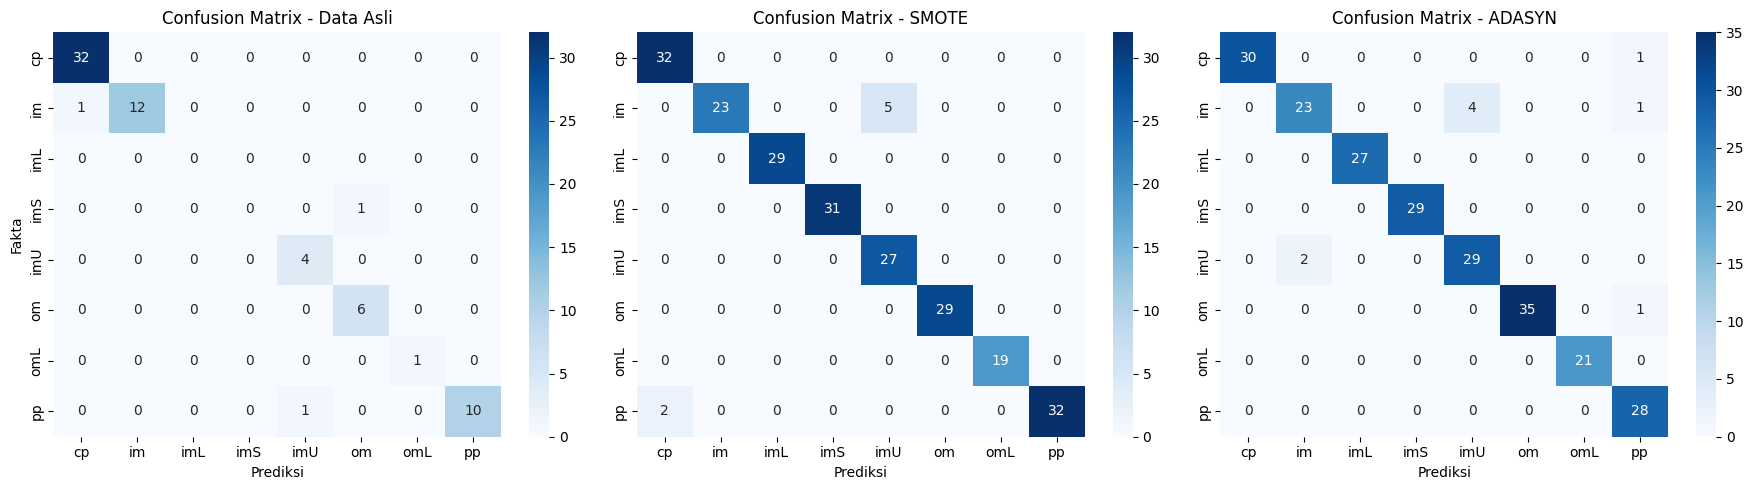

In [ ]:
# data yang sebelum di overesampling

akurasi = accuracy_score(y_test, prediksi)

# data yang sudah di oversampling menggunakan SMOTE

akurasi_smote = accuracy_score(y_test_smote, prediksi_smote)

# data yang sudah di oversampling menggunakan ADASYN

akurasi_adasyn = accuracy_score(y_test_adasyn, prediksi_adasyn)


label = ['Data asli', 'SMOTE', 'ADASYN']
temp = [akurasi, akurasi_smote, akurasi_adasyn]

fig, ax = plt.subplots(figsize=(8,6))

bc = ax.bar(label, temp, color=['#1f77b4','#ff7f0e','#2ca02c'])

ax.bar_label(bc, label_type='center', color='w', fontweight='bold')

ax.set(
    xlabel='Kondisi Data',
    ylabel='Akurasi Klasifikasi Random Forest',
    title='Perbandingan Akurasi Data'
)

ax.set_ylim(0, 1.05)

plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Data asli
labels = np.unique(np.concatenate([y_train, y_test]))
cm = confusion_matrix(y_test, prediksi, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Confusion Matrix - Data Asli")
axes[0].set_xlabel("Prediksi")
axes[0].set_ylabel("Fakta")

# Data SMOTE
labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))
cm = confusion_matrix(y_test_smote, prediksi_smote, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Confusion Matrix - SMOTE")
axes[1].set_xlabel("Prediksi")
axes[1].set_ylabel("")

# Data ADASYN
labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))
cm = confusion_matrix(y_test_adasyn, prediksi_adasyn, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_title("Confusion Matrix - ADASYN")
axes[2].set_xlabel("Prediksi")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

## **Kesimpulan**

Grafik perbandingan akurasi menunjukkan bahwa ketiga kondisi data — data asli, data hasil SMOTE, dan data hasil ADASYN — sama-sama memiliki akurasi yang tinggi (di atas 95%).

* Data Asli menghasilkan akurasi sebesar 95,59%.

* SMOTE meningkatkan akurasi menjadi 96,94%, sedikit lebih tinggi dibanding data asli.

* ADASYN juga meningkatkan performa dengan akurasi 96,10%, meskipun tidak setinggi SMOTE.

Jika dilihat dari confusion matrix:

* Pada data asli, model cenderung hanya mengenali kelas mayoritas dengan baik (misalnya kelas cp dan im), tetapi masih banyak kelas minoritas yang salah klasifikasi (beberapa hanya terdeteksi sebagian kecil).

* Setelah dilakukan SMOTE, distribusi prediksi menjadi lebih seimbang. Hampir semua kelas minoritas seperti imL, imS, imU, om, omL, dan pp dikenali lebih baik dibanding data asli. Hal ini menunjukkan bahwa SMOTE efektif dalam mengatasi ketidakseimbangan data.

* Dengan ADASYN, hasilnya juga membaik dibanding data asli. Beberapa kelas minoritas mendapat prediksi lebih baik, meskipun masih terdapat sedikit kesalahan prediksi pada kelas tertentu.